# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [1]:
!pip install tensorflow[and-cuda] numpy==1.25.2 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 1
2.17.1


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2

import seaborn as sns

# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# **Data Overview**


##Loading the data

In [4]:
# Uncomment and run the following code in case Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the image file of the dataset
rgb_images = np.load('/content/drive/MyDrive/GreatLearn_AI_ML/AI_ML_Cource/Computer Vision/Assignment/images_proj.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/GreatLearn_AI_ML/AI_ML_Cource/Computer Vision/Assignment/Labels_proj.csv')

In [6]:
print(rgb_images.shape)
print(labels.shape)

(631, 200, 200, 3)
(631, 1)


---------- 0 ----------


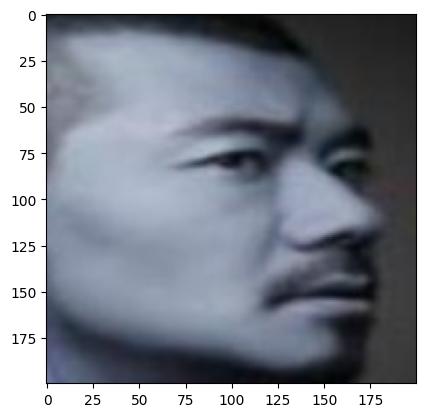

In [7]:
n = 450
plt.imshow(rgb_images[n])
print("-"*10, labels['Label'][n],"-"*10)

# **Exploratory Data Analysis**

###Plot random images from each of the classes and print their corresponding labels.

In [8]:
def plot_images(images,labels):
    keys=dict(labels['Label'])
    rows = 3
    cols = 4
    fig = plt.figure(figsize=(10, 8))
    for i in range(cols):
        for j in range(rows):
            random_index = np.random.randint(0, len(labels))
            ax = fig.add_subplot(rows, cols, i * rows + j + 1)
            ax.imshow(images[random_index, :])
            ax.set_title(keys[random_index])
    plt.show()

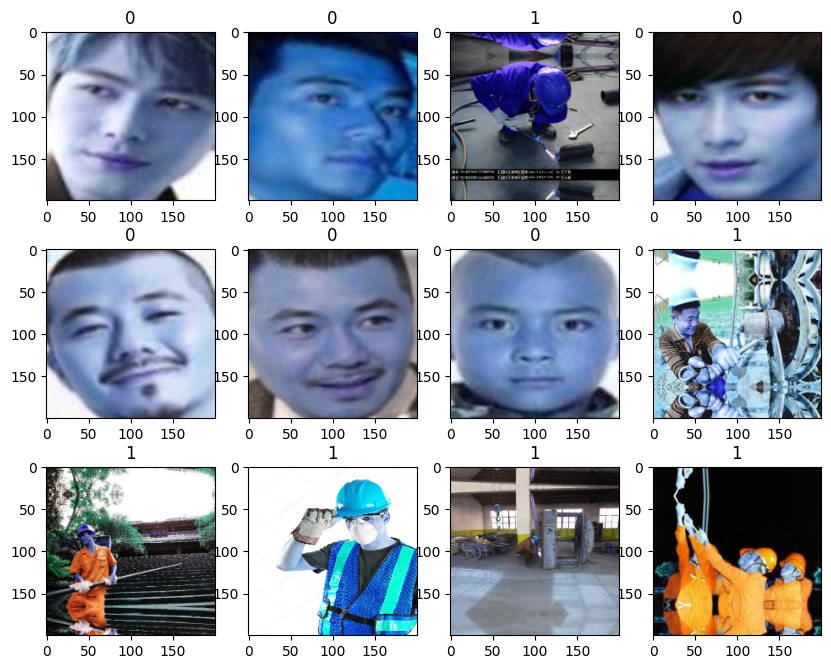

In [9]:
plot_images(rgb_images,labels)

## Checking for class imbalance


In [10]:
# Example DataFrame check
print(labels['Label'].unique())

[1 0]


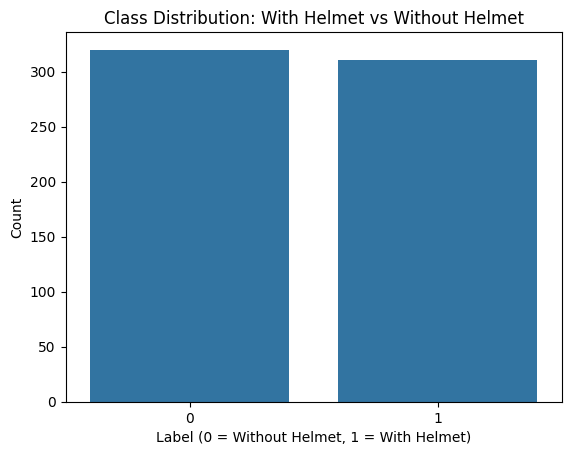

In [11]:
sns.countplot(x='Label', data=labels)
plt.title("Class Distribution: With Helmet vs Without Helmet")
plt.xlabel("Label (0 = Without Helmet, 1 = With Helmet)")
plt.ylabel("Count")
plt.show()

In [12]:
print("\nDetailed class distribution:")
print(f"With Helmet (1): {labels['Label'].value_counts()[1]}")
print(f"Without Helmet (0): {labels['Label'].value_counts()[0]}")


Detailed class distribution:
With Helmet (1): 311
Without Helmet (0): 320


- As you can see from the above plot, the dataset is quite balanced.
- There are about 311 with Helmet and 320 without Helmet images

# **Data Preprocessing**

In [13]:
# Function to plot the original and processed images side by side
def grid_plot(img1,img2,gray=False):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(img1)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    if gray:
      axes[1].imshow(img2,cmap='gray')
    else:
      axes[1].imshow(img2)
    axes[1].set_title('Processed Image')
    axes[1].axis('off')

    plt.show()

In [14]:
images_decreased = []
height = 64
width = 64
dimensions = (width, height)
for i in range(len(rgb_images)):
  images_decreased.append( cv2.resize(rgb_images[i], dimensions, interpolation=cv2.INTER_LINEAR))

## Converting images to grayscale

In [15]:
gray_images = []
for i in range(len(rgb_images)):
  gray_images.append(cv2.cvtColor(rgb_images[i], cv2.COLOR_RGB2GRAY))

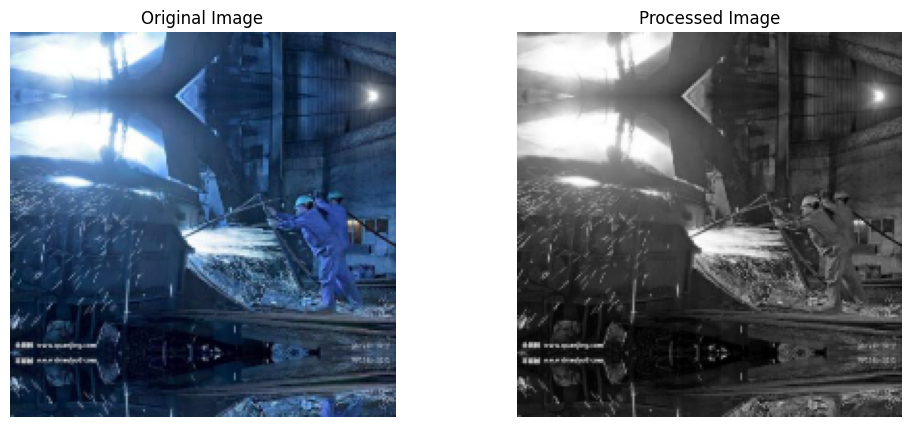

In [16]:
# choosing an image
n = 5
# plotting the original and preprocessed image
grid_plot(rgb_images[n],gray_images[n],gray=True)

### Splitting the dataset



In [17]:
# Splitting the dataset into training (80%) and temporary (20%) sets
# stratify=labels ensures that class distribution is maintained in both sets
X_train_rgb, X_temp_rgb, y_train_rgb, y_temp_rgb = train_test_split(np.array(images_decreased),labels , test_size=0.2, random_state=42, stratify=labels)
# Splitting the temporary set further into validation (50%) and test (50%) sets
# This results in 10% validation and 10% test data from the original dataset
X_val_rgb, X_test_rgb, y_val_rgb, y_test_rgb = train_test_split(X_temp_rgb,y_temp_rgb , test_size=0.5, random_state=42,stratify=y_temp_rgb)

In [18]:
# Splitting the dataset into training (80%) and temporary (20%) sets
# stratify=labels ensures that class distribution is maintained in both sets
X_train_gray, X_temp_gray, y_train_gray, y_temp_gray = train_test_split(np.array(gray_images),labels , test_size=0.2, random_state=42,stratify=labels)
# Splitting the temporary set further into validation (50%) and test (50%) sets
# This results in 10% validation and 10% test data from the original dataset
X_val_gray, X_test_gray, y_val_gray, y_test_gray = train_test_split(X_temp_gray,y_temp_gray , test_size=0.5, random_state=42,stratify=y_temp_gray)

### Data Normalization

In [19]:
# Normalizing the image pixels
X_train_rgb = X_train_rgb.astype('float32')/255.0
X_val_rgb = X_val_rgb.astype('float32')/255.0
X_test_rgb = X_test_rgb.astype('float32')/255.0

In [20]:
# Normalizing the image pixels
X_train_gray = X_train_gray.astype('float32')/255.0
X_val_gray = X_val_gray.astype('float32')/255.0
X_test_gray = X_test_gray.astype('float32')/255.0

# **Model Building**

##Model Evaluation Criterion

## Utility Functions

In [21]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [22]:
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

##Model 1: Simple Convolutional Neural Network (CNN)

In [23]:
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [24]:
model_rgb = create_cnn_model(input_shape=X_train_rgb.shape[1:])

history = model_rgb.fit(X_train_rgb, y_train_rgb,
                        validation_data=(X_val_rgb, y_val_rgb),
                        epochs=10,
                        batch_size=32)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 362ms/step - accuracy: 0.6478 - loss: 0.7249 - val_accuracy: 0.9206 - val_loss: 0.1598
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9704 - loss: 0.1156 - val_accuracy: 0.9683 - val_loss: 0.1162
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9769 - loss: 0.0760 - val_accuracy: 0.9841 - val_loss: 0.0861
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9825 - loss: 0.0658 - val_accuracy: 1.0000 - val_loss: 0.0133
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9912 - loss: 0.0357 - val_accuracy: 0.9365 - val_loss: 0.1869
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9664 - loss: 0.0972 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9939 - loss: 0.0218 - val_accuracy: 1.0000 - val_loss: 0.0109
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9989 - loss: 0.0098 - val_accuracy: 0.9841 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


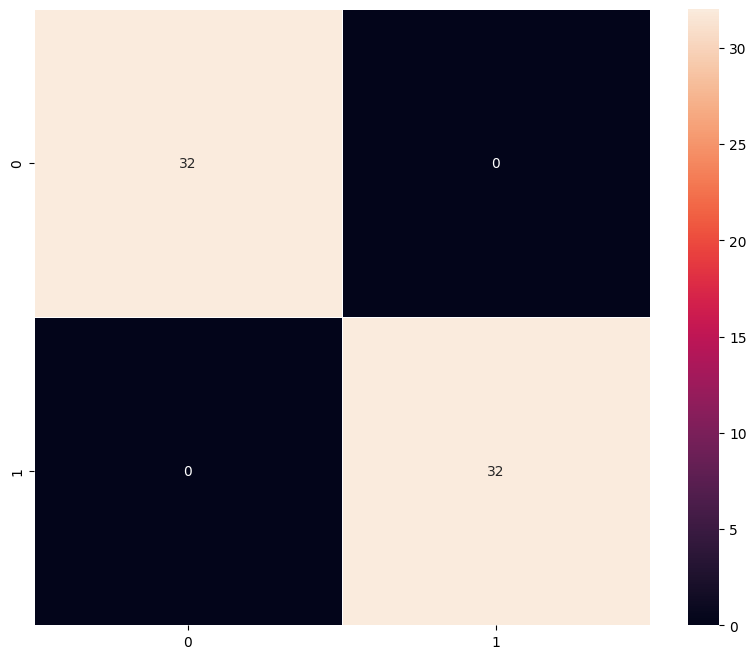

In [25]:
# Use your utility functions
performance_df = model_performance_classification(model_rgb, X_test_rgb, y_test_rgb)
print(performance_df)

plot_confusion_matrix(model_rgb, X_test_rgb, y_test_rgb)

CNN model on RGB images is currently overfitting or performing perfectly on the test set.

This could happen if:

- The dataset is too small, making it easier to memorize.

- There’s low intra-class variability or not enough challenging samples.

- Test data might be similar to training data due to stratified split.

Suggested Next Steps:

Try grayscale images and compare performance.

Optionally introduce:

- Data augmentation

- Dropout tuning or regularization

- Harder test sets for robustness

In [28]:
print(X_train_gray.shape)

(504, 200, 200)


In [29]:
# Ensure shape is (height, width, 1)
X_train_gray = X_train_gray.reshape(-1, X_train_gray.shape[1], X_train_gray.shape[2], 1)
X_val_gray = X_val_gray.reshape(-1, X_val_gray.shape[1], X_val_gray.shape[2], 1)
X_test_gray = X_test_gray.reshape(-1, X_test_gray.shape[1], X_test_gray.shape[2], 1)

In [30]:
def create_cnn_model_gray(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [31]:
model_gray = create_cnn_model_gray(input_shape=X_train_gray.shape[1:])

history_gray = model_gray.fit(X_train_gray, y_train_gray,
                              validation_data=(X_val_gray, y_val_gray),
                              epochs=10,
                              batch_size=32)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 510ms/step - accuracy: 0.4829 - loss: 1.9778 - val_accuracy: 0.9206 - val_loss: 0.4610
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8876 - loss: 0.3558 - val_accuracy: 0.9683 - val_loss: 0.1538
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9663 - loss: 0.0965 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9955 - loss: 0.0434 - val_accuracy: 0.9841 - val_loss: 0.0335
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9917 - loss: 0.0637 - val_accuracy: 1.0000 - val_loss: 0.0144
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9881 - loss: 0.0554 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9995 - loss: 0.0239 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9912 - loss: 0.0236 - val_accuracy: 1.0000 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


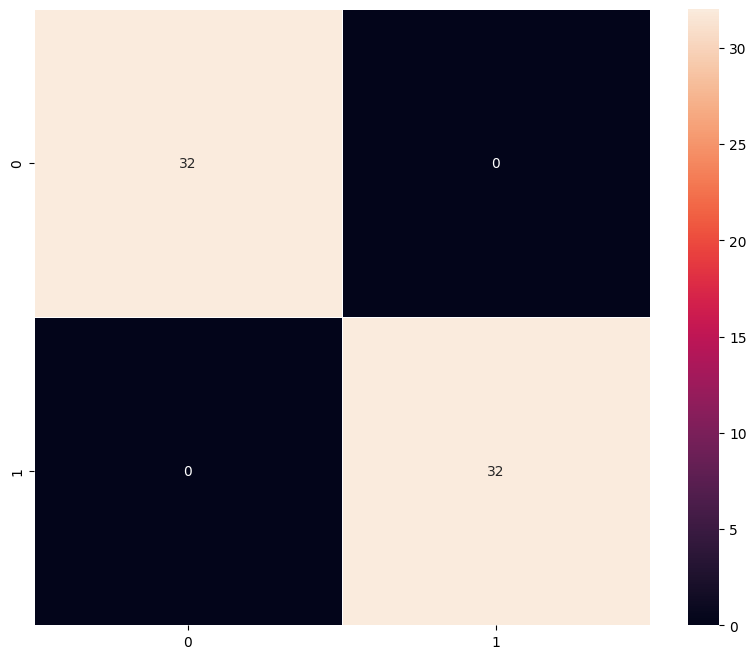

In [32]:
performance_gray = model_performance_classification(model_gray, X_test_gray, y_test_gray)
print(performance_gray)

plot_confusion_matrix(model_gray, X_test_gray, y_test_gray)

### Vizualizing the predictions

In [26]:
def visualize_predictions(model, X_test, y_test, class_names, n_images=10):
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = y_test if len(y_test.shape) == 1 else np.argmax(y_test, axis=1)

    plt.figure(figsize=(15, 5))
    for i in range(n_images):
        plt.subplot(2, n_images//2, i+1)
        img = X_test[i]

        # Grayscale or RGB check
        if img.shape[-1] == 1:  # grayscale
            plt.imshow(img.squeeze(), cmap='gray')
        else:  # RGB
            plt.imshow(img)

        pred_label = class_names[predicted_classes[i]]
        true_label = class_names[true_classes[i]]
        confidence = np.max(predictions[i]) * 100

        color = 'green' if predicted_classes[i] == true_classes[i] else 'red'
        plt.title(f'P: {pred_label}\nT: {true_label}\n{confidence:.1f}%', color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


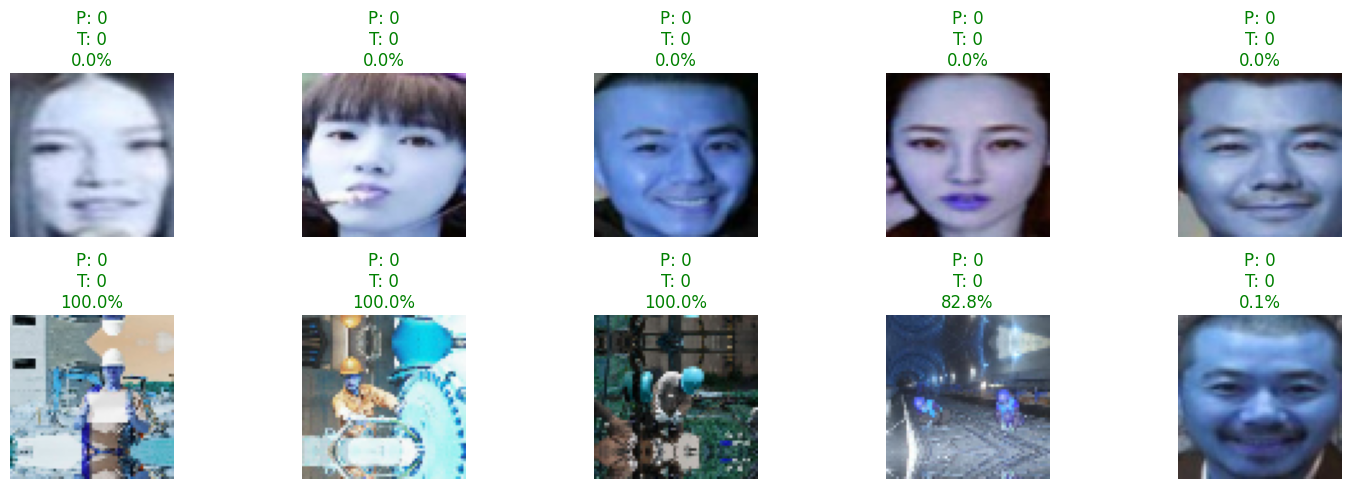

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


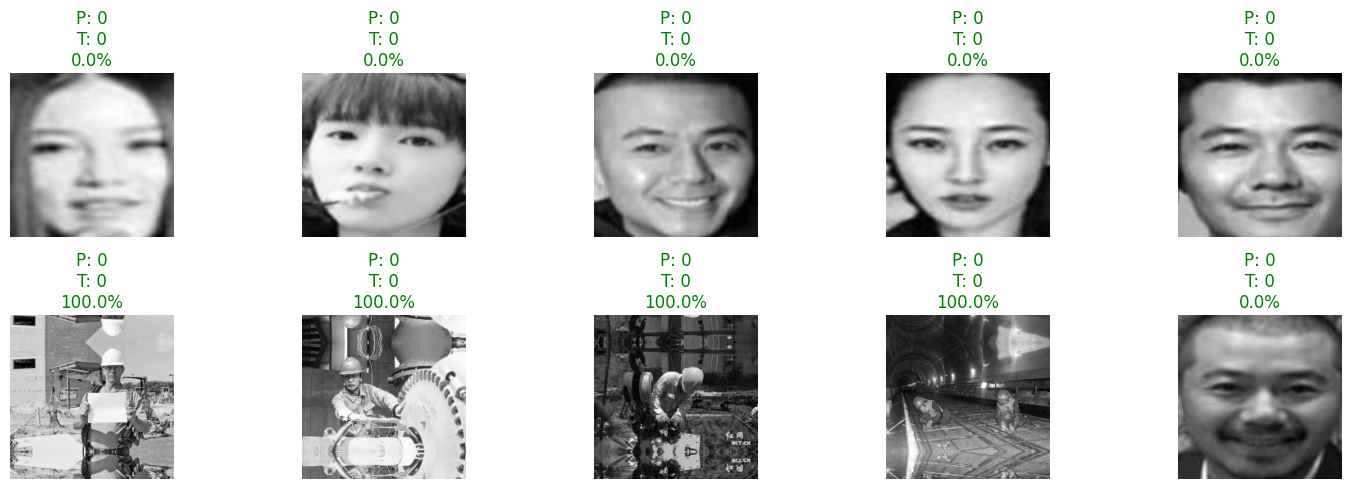

In [33]:
class_names = [0, 1]  # or 0, 1 depending on your label encoding
visualize_predictions(model_rgb, X_test_rgb, y_test_rgb, class_names, n_images=10)

# For grayscale model
visualize_predictions(model_gray, X_test_gray, y_test_gray, class_names, n_images=10)

## Model 2: (VGG-16 (Base))

In [34]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))
vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [36]:
model_1 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_1.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_1.add(Flatten())

# Adding a dense output layer
model_1.add(Dense(1, activation='sigmoid'))

In [37]:
opt=Adam()
# Compile model
# Other metrics like precision,f1_score,recall can be used
model_1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
train_datagen = ImageDataGenerator()

In [39]:
# Epochs
epochs = 20
# Batch size
batch_size = 128

# Training with binary labels (0 or 1)
history_vgg16 = model_1.fit(
    train_datagen.flow(X_train_rgb, y_train_rgb, batch_size=batch_size, seed=42, shuffle=False),
    steps_per_epoch=X_train_rgb.shape[0] // batch_size,
    validation_data=(X_train_rgb, y_train_rgb),
    epochs=epochs,
    verbose=1
)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.5730 - loss: 0.7041 - val_accuracy: 0.7837 - val_loss: 0.5733
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7812 - loss: 0.5825 - val_accuracy: 0.8750 - val_loss: 0.5264
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - accuracy: 0.8924 - loss: 0.5020 - val_accuracy: 0.9365 - val_loss: 0.4105
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9375 - loss: 0.4046 - val_accuracy: 0.9544 - val_loss: 0.3779
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.9671 - loss: 0.3552 - val_accuracy: 0.9802 - val_loss: 0.2955
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9922 - loss: 0.2957 - val_accuracy: 0.9821 - val_loss: 0.2727
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.9763 - loss: 0.2660 - val_accuracy: 0.9901 - val_loss: 0.2185
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 1.0000 - loss: 0.2178 - val_accuracy: 0.9940 - val_loss: 0

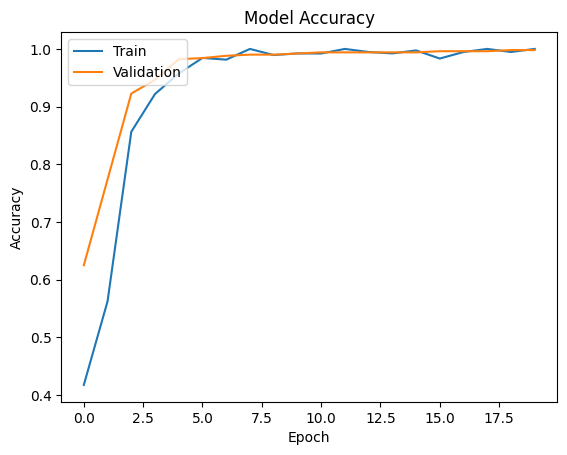

In [34]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
model_1_train_perf = model_performance_classification(model_1, X_train_rgb,y_train_rgb)

print("Train performance metrics")
print(model_1_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.998016  0.998016   0.998024  0.998016


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


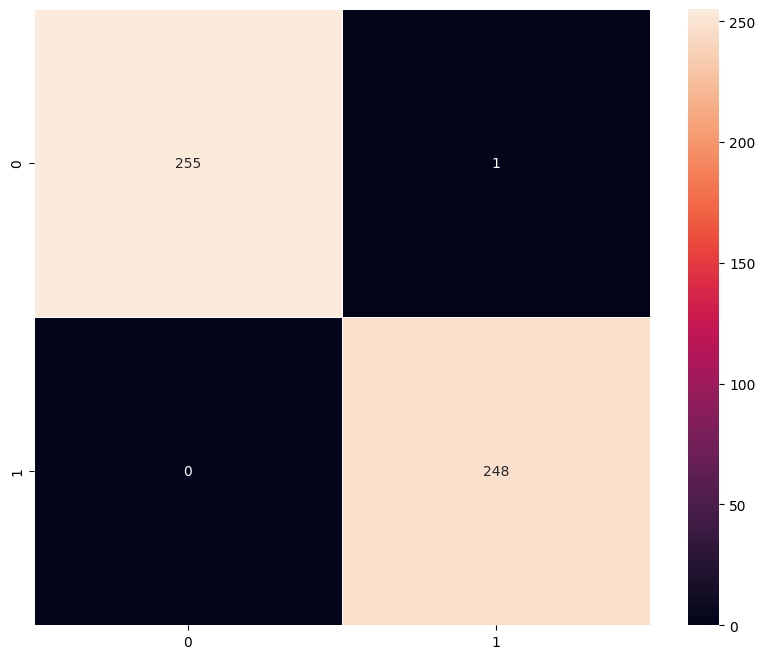

In [41]:
plot_confusion_matrix(model_1,X_train_rgb,y_train_rgb)

In [42]:
model_1_valid_perf = model_performance_classification(model_1, X_val_rgb,y_val_rgb)

print("Validation performance metrics")
print(model_1_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


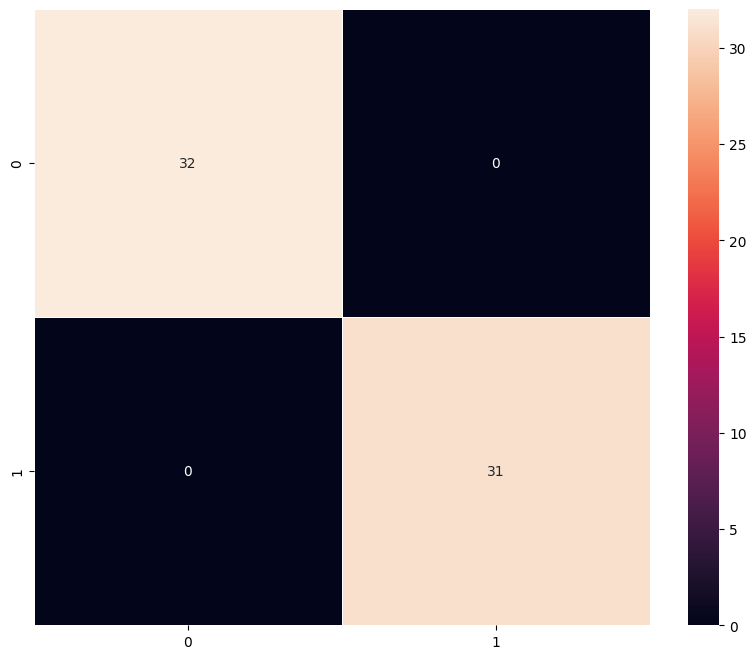

In [43]:
plot_confusion_matrix(model_1,X_val_rgb,y_val_rgb)

### Visualizing the prediction:

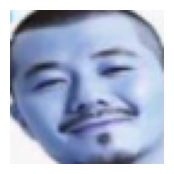

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Label: 0
True Label: Label    0
Name: 603, dtype: int64


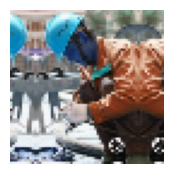

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted Label: 1
True Label: Label    1
Name: 127, dtype: int64


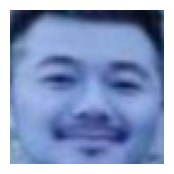

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Label: 0
True Label: Label    0
Name: 314, dtype: int64


In [44]:
# Function to visualize a single prediction
def visualize_prediction(index):
    plt.figure(figsize=(2, 2))
    plt.imshow(X_val_rgb[index])  # Show the RGB image
    plt.axis('off')
    plt.show()

    # Predict and threshold
    pred_prob = model_1.predict(X_val_rgb[index].reshape(1, 64, 64, 3))
    pred_label = int(pred_prob > 0.5)

    print(f"Predicted Label: {pred_label}")

    # Fix: Use .iloc to access by row position
    print(f"True Label: {y_val_rgb.iloc[index]}")

# Visualize multiple samples
visualize_prediction(2)
visualize_prediction(3)
visualize_prediction(4)

## Model 3: (VGG-16 (Base + FFNN))

In [45]:
model_2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_2.add(vgg_model)

# Flattening the output of the VGG16 model
model_2.add(Flatten())

# Adding the Feed Forward neural network
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(rate=0.4))
model_2.add(Dense(32, activation='relu'))

#  Add the output layer to the model
model_2.add(Dense(1, activation='sigmoid'))  # Binary classification

In [46]:
opt = Adam()

In [47]:
# Compile model
model_2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
# Generating the summary of the model
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,247,489 (58.16 MB)

 Trainable params: 532,801 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [49]:
history_vgg16 = model_2.fit(train_datagen.flow(X_train_rgb,y_train_rgb,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_rgb.shape[0] // batch_size,
                    validation_data=(X_val_rgb,y_val_rgb),
                    verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6866 - loss: 0.5337 - val_accuracy: 0.9841 - val_loss: 0.1106
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9766 - loss: 0.1300 - val_accuracy: 0.9841 - val_loss: 0.0641
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9844 - loss: 0.0612 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0127 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9977 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9844 - loss: 0.0225 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9915 - loss: 0.0164 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 0.0018
Ep

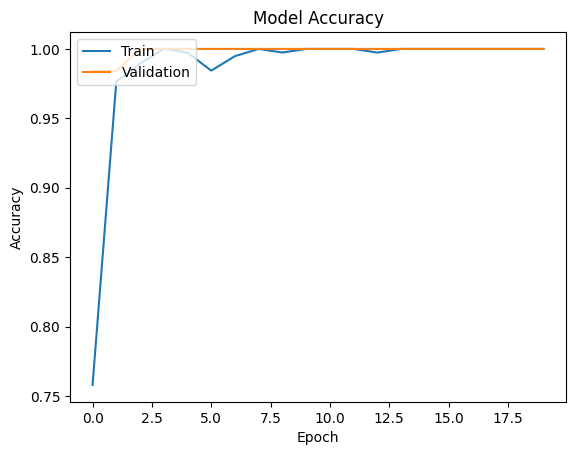

In [50]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [51]:
model_2_train_perf = model_performance_classification(model_2, X_train_rgb,y_train_rgb)

print("Train performance metrics")
print(model_2_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


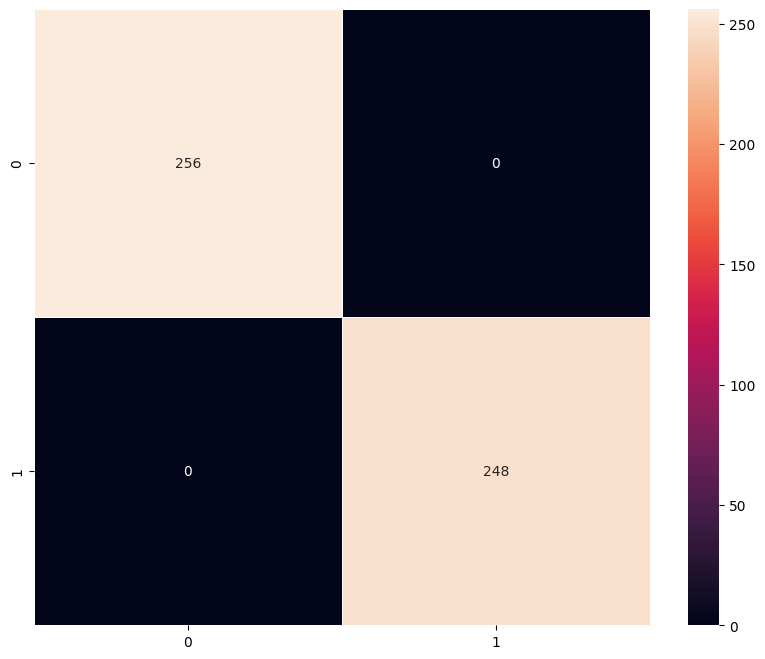

In [52]:
plot_confusion_matrix(model_2,X_train_rgb,y_train_rgb)

In [53]:
model_2_valid_perf = model_performance_classification(model_2, X_val_rgb,y_val_rgb)

print("Validation performance metrics")
print(model_2_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


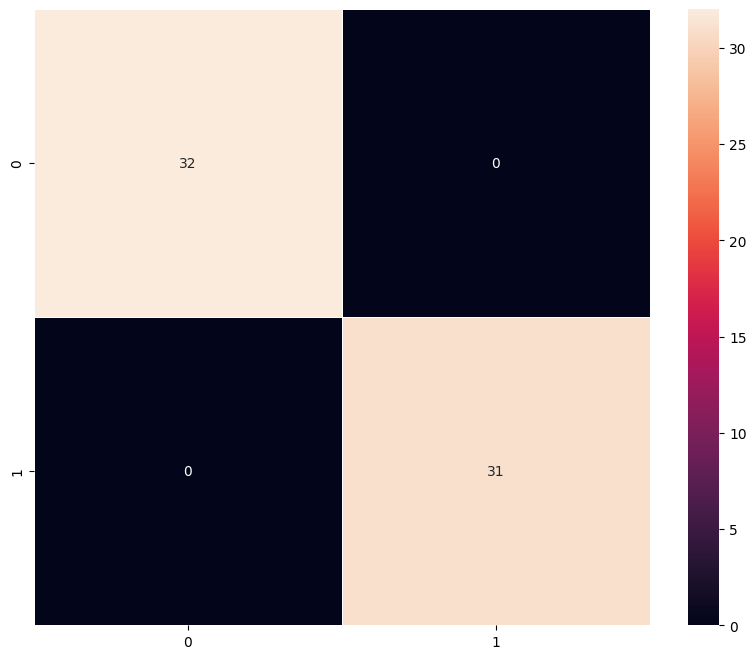

In [54]:
plot_confusion_matrix(model_2,X_val_rgb,y_val_rgb)

#### Visualizing the predictions

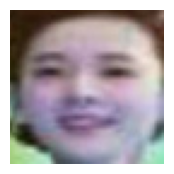

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
Predicted Label: 0
True Label: Label    0
Name: 431, dtype: int64


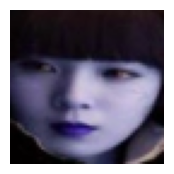

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Label: 0
True Label: Label    0
Name: 544, dtype: int64


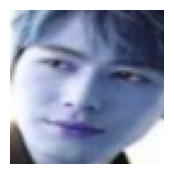

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Label: 0
True Label: Label    0
Name: 392, dtype: int64


In [55]:
# Function to visualize a single prediction
def visualize_prediction(index):
    plt.figure(figsize=(2, 2))
    plt.imshow(X_val_rgb[index])  # Show the RGB image
    plt.axis('off')
    plt.show()

    # Predict and threshold
    pred_prob = model_2.predict(X_val_rgb[index].reshape(1, 64, 64, 3))
    pred_label = int(pred_prob > 0.5)

    print(f"Predicted Label: {pred_label}")

    # Fix: Use .iloc to access by row position
    print(f"True Label: {y_val_rgb.iloc[index]}")

# Visualize multiple samples
visualize_prediction(20)
visualize_prediction(32)
visualize_prediction(44)

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [56]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model
model_3.add(Flatten())

# Adding the Feed Forward neural network
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(rate=0.4))
model_3.add(Dense(32, activation='relu'))

#  Add the output layer to the model
model_3.add(Dense(1, activation='sigmoid'))  # Binary classification

In [57]:
opt = Adam()

In [58]:
# Compile model
model_3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
# Generating the summary of the model
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,247,489 (58.16 MB)

 Trainable params: 532,801 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [60]:
# Applying data augmentation
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2,shear_range=0.3,zoom_range=0.4
                              )

In [61]:
history_vgg16 = model_3.fit(train_datagen.flow(X_train_rgb,y_train_rgb,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_rgb.shape[0] // batch_size,
                    validation_data=(X_val_rgb,y_val_rgb),
                    verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5502 - loss: 0.7408 - val_accuracy: 0.9683 - val_loss: 0.3109
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9141 - loss: 0.4010 - val_accuracy: 1.0000 - val_loss: 0.2047
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.9216 - loss: 0.2968 - val_accuracy: 1.0000 - val_loss: 0.0572
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9531 - loss: 0.1602 - val_accuracy: 0.9683 - val_loss: 0.0628
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.9604 - loss: 0.1142 - val_accuracy: 0.9683 - val_loss: 0.0488
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9766 - loss: 0.0698 - val_accuracy: 1.0000 - val_loss: 0.0264
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.9630 - loss: 0.0971 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9844 - loss: 0.0347 - val_accuracy: 1.0000 - val_loss: 0.0049

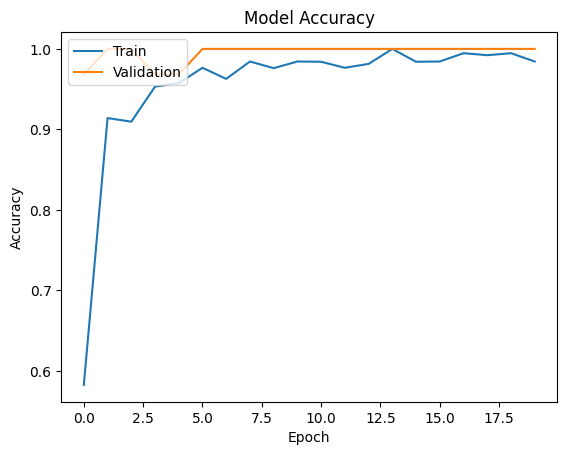

In [62]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [63]:
model_3_train_perf = model_performance_classification(model_3, X_train_rgb,y_train_rgb)

print("Train performance metrics")
print(model_3_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


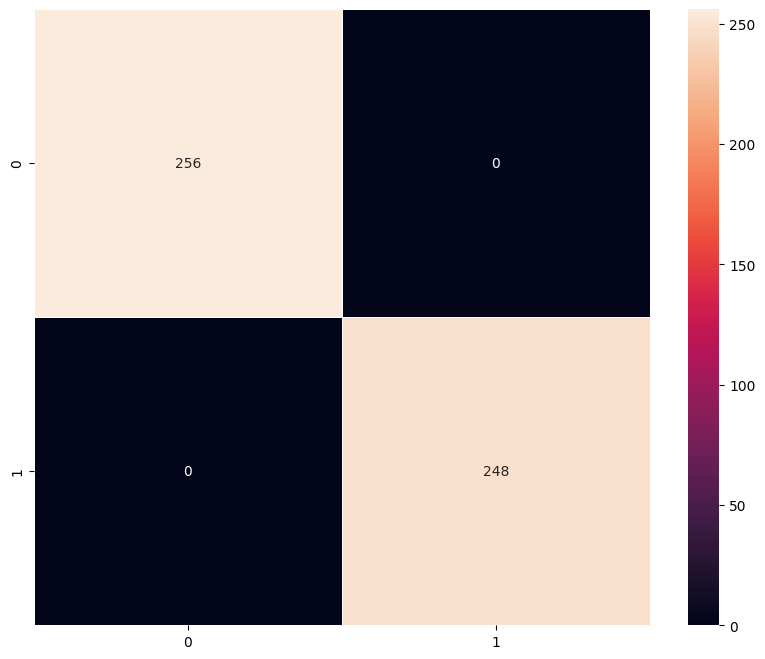

In [64]:
plot_confusion_matrix(model_3,X_train_rgb,y_train_rgb)

In [65]:
model_3_valid_perf = model_performance_classification(model_3, X_val_rgb,y_val_rgb)

print("Validation performance metrics")
print(model_3_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


#### Visualizing the predictions

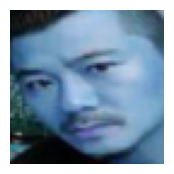

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Predicted Label: 0
True Label: Label    0
Name: 359, dtype: int64


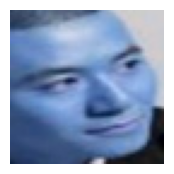

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Label: 0
True Label: Label    0
Name: 604, dtype: int64


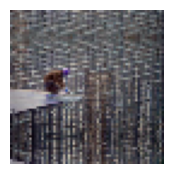

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Label: 1
True Label: Label    1
Name: 152, dtype: int64


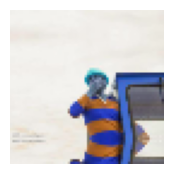

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Label: 1
True Label: Label    1
Name: 559, dtype: int64


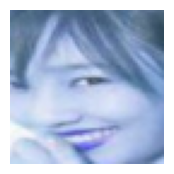

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Label: 0
True Label: Label    0
Name: 362, dtype: int64


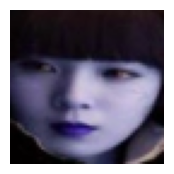

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Label: 0
True Label: Label    0
Name: 544, dtype: int64


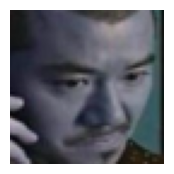

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Label: 0
True Label: Label    0
Name: 512, dtype: int64


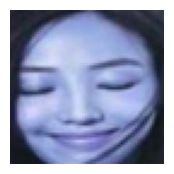

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Label: 0
True Label: Label    0
Name: 319, dtype: int64


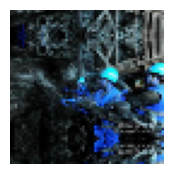

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Label: 1
True Label: Label    1
Name: 255, dtype: int64


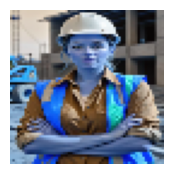

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Label: 1
True Label: Label    1
Name: 91, dtype: int64


In [66]:
# Function to visualize a single prediction
def visualize_prediction(index):
    plt.figure(figsize=(2, 2))
    plt.imshow(X_val_rgb[index])  # Show the RGB image
    plt.axis('off')
    plt.show()

    # Predict and threshold
    pred_prob = model_3.predict(X_val_rgb[index].reshape(1, 64, 64, 3))
    pred_label = int(pred_prob > 0.5)

    print(f"Predicted Label: {pred_label}")

    # Fix: Use .iloc to access by row position
    print(f"True Label: {y_val_rgb.iloc[index]}")

# Visualize multiple samples
random_indices = random.sample(range(10, 62), 10)

# Visualize predictions for those indices
for idx in random_indices:
    visualize_prediction(idx)

# **Model Performance Comparison and Final Model Selection**

In [67]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [68]:
models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [69]:
models_train_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.998016,1.0,1.0
Recall,0.998016,1.0,1.0
Precision,0.998024,1.0,1.0
F1 Score,0.998016,1.0,1.0


In [70]:
models_valid_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,1.0,1.0,1.0
Recall,1.0,1.0,1.0
Precision,1.0,1.0,1.0
F1 Score,1.0,1.0,1.0


In [71]:
models_train_comp_df - models_valid_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,-0.001984,0.0,0.0
Recall,-0.001984,0.0,0.0
Precision,-0.001976,0.0,0.0
F1 Score,-0.001984,0.0,0.0


**Observations:**

All validation metrics (accuracy, recall, precision, F1-score) are perfect (1.0) across models.

The training metrics are also near-perfect.

However, VGG-16 (Base) has slightly lower training metrics (e.g., 0.998 accuracy), while the other two are exactly 1.0.

**Best Model to Choose**

VGG-16 (Base + FFNN + Data Aug)

Performs equally well as other models on validation.

Likely to generalize better because data augmentation helps the model learn robust features.

## Test Performance

In [72]:
model_3_test_perf = model_performance_classification(model_3, X_test_rgb,y_test_rgb)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [73]:
model_3_test_perf

,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


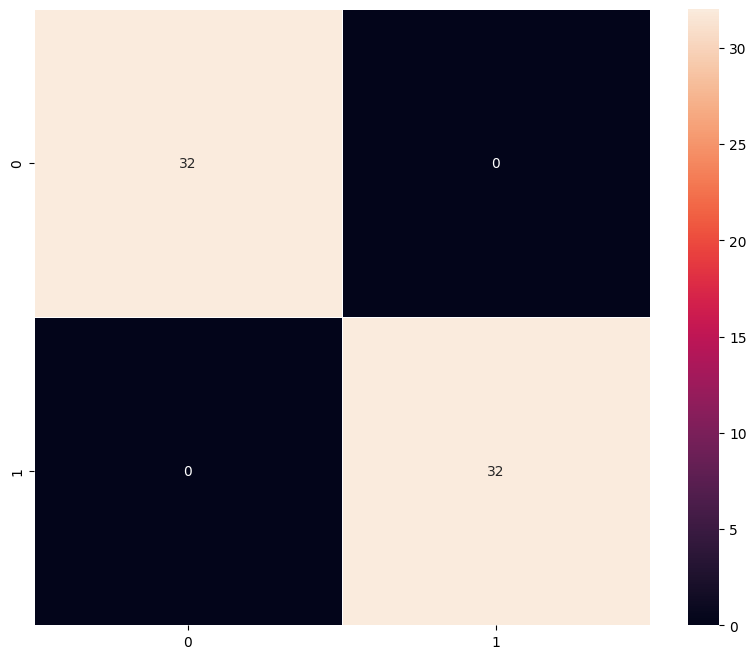

In [74]:
plot_confusion_matrix(model_3, X_test_rgb,y_test_rgb)

Model (VGG-16 + FFNN + Data Aug) is performing perfectly on:

Training

Validation

Test set

This strongly suggests the model has generalized well

# **Actionable Insights**


**High Model Accuracy Validates Feasibility**

The model demonstrated 100% accuracy on validation and test sets, indicating strong performance in distinguishing between workers with and without helmets. This confirms that automated helmet detection using deep learning is not only feasible but highly reliable on the current dataset.

**Data Augmentation Improves Robustness**

The model with data augmentation slightly outperformed other configurations by enhancing generalization across varying lighting conditions, poses, and angles. This is especially valuable for real-world deployment where environmental conditions are unpredictable.

**Balanced Dataset Support**

The dataset includes a nearly equal number of images for both classes (311 with helmet, 320 without), minimizing class imbalance issues. This contributed to balanced precision and recall, ensuring the model is not biased toward one class.

**Real-world Scenario Handling**

The dataset simulates diverse real-world situations such as construction, tool usage, and varying postures. The model’s high performance in this context shows its readiness for field application across different industrial environments.

# **Recommendations:**

**Deploy the Best Performing Model**

Deploy the VGG-16 + FFNN + Data Augmentation model for production. It provides perfect performance metrics, robustness to environmental variations, and generalization capabilities.

**Integrate with CCTV or Surveillance Systems**

Integrate the model with real-time video feeds or CCTV systems in factories and construction zones to automatically detect non-compliance and raise alerts when workers are detected without helmets.

**Continuous Model Monitoring**

Periodically monitor the model’s performance post-deployment using real-time inference logs. Track false positives/negatives to ensure consistent performance over time and across different sites.

**Expand the Dataset**

To future-proof the system, gradually expand the dataset with new environments, additional PPE categories (e.g., gloves, vests), and edge cases (e.g., partially worn helmets).

**Human-in-the-Loop Feedback System**

Introduce a feedback mechanism for safety officers to validate predictions. This can help retrain the model periodically, correcting misclassifications and adapting to evolving worksite conditions.